In [60]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import sys
import tkinter as tk
from tkinter import filedialog
sys.path.append("../")

from utils.preprocessing import *

In [61]:
pose_csv = '/Users/kaycei/K on Server (NoMachine)/KayCei/Naturalistic Closed Loop/2nd Cohort/AD22-D1/Videos/030624-RT BILATERAL/VideoOutputCamera 0-06032024-195912DLC_resnet50_bottomup_clearSep21shuffle1_1030000.csv'
pose_df = pd.read_csv(pose_csv, header=[0, 1, 2], index_col=0)
pose = np.array([pose_df.iloc[:, c] for c in np.arange(pose_df.shape[1]) if not np.mod(c, 3)==2]).T
print(pose.shape)

(120752, 12)


In [62]:
save_path = os.path.dirname(pose_csv)  # Get the directory of pose_csv
%store save_path
print(save_path)

Stored 'save_path' (str)
/Users/kaycei/K on Server (NoMachine)/KayCei/Naturalistic Closed Loop/2nd Cohort/AD22-D1/Videos/030624-RT BILATERAL


### original data table

In [63]:
pose_df[::3].head(40)

scorer    DLC_resnet50_bottomup_clearSep21shuffle1_1030000              \
bodyparts                                            snout               
coords                                                   x           y   
0                                               846.342896  591.282227   
3                                               843.104614  589.595459   
6                                               697.772095  245.203278   
9                                               846.321228  591.690430   
12                                              696.144958  249.125320   
15                                              701.418030  244.666351   
18                                              700.639587  253.376511   
21                                              698.393982  250.677429   
24                                              692.203613  244.993561   
27                                              844.107178  588.692078   
30                                              685.398132  251.664764   
33                                              654.273865  253.610718   
36                                              842.457336  589.784302   
39                                              686.482422  242.158676   
42                                              658.599182  250.610596   
45                                              841.969910  590.231262   
48                                              843.080200  589.348389   
51                                              842.509827  590.006470   
54                                              694.402710  246.188950   
57                                              662.168884  251.193985   
60                                              842.393921  587.394836   
63                                              691.760864  239.853699   
66                                              841.778687  589.138916   
69                                              842.477112  589.132874   
72                                              842.687317  589.975220   
75                                              844.703308  591.348755   
78                                              699.096252  246.722488   
81                                              844.382568  591.485840   
84                                              703.240723  237.288437   
87                                              707.750610  228.711075   
90                                              701.842041  239.978546   
93                                              666.461975  252.841187   
96                                              706.533264  227.625839   
99                                              841.811218  589.311829   
102                                             842.272827  588.540771   
105                                             842.601501  588.584839   
108                                             843.532349  588.925964   
111                                             842.917480  589.221741   
114                                             700.678711  234.316132   
117                                             845.388550  590.940735   

scorer                                                                  \
bodyparts            right-forepaw                        left-forepaw   
coords    likelihood             x           y likelihood            x   
0           0.484482    703.358887  242.241196   0.995782   695.453186   
3           0.197401    699.389343  241.633850   0.999548   697.631958   
6           0.997025    699.557617  240.152039   0.867621   695.796204   
9           0.002871    696.657898  242.864700   0.999051   694.687500   
12          0.981074    697.113647  241.407852   0.996508   694.233643   
15          0.996052    700.592590  237.543686   0.999761   668.501770   
18          0.999786    698.405518  243.863541   0.994135   694.104675   
21          0.999727    697.787842  240.982925   0.993261   693.297668   
24 

### after removing likelihood and headers

In [64]:
pose[:5, :]

array([[846.34289551, 591.28222656, 703.35888672, 242.24119568,
        695.45318604, 245.66323853, 720.53692627, 210.93309021,
        676.68017578, 210.86592102, 691.80548096, 170.92126465],
       [662.78656006, 256.01513672, 696.96832275, 245.32240295,
        693.27532959, 245.07669067, 721.04675293, 211.61099243,
        677.01501465, 211.53779602, 693.30767822, 170.86401367],
       [844.0736084 , 588.50592041, 700.15942383, 245.6782074 ,
        695.64331055, 247.80830383, 721.18786621, 211.66018677,
        677.16021729, 211.56758118, 692.62249756, 170.77693176],
       [843.10461426, 589.59545898, 699.38934326, 241.6338501 ,
        697.63195801, 244.19587708, 721.24468994, 211.21276855,
        677.30450439, 211.65458679, 692.71514893, 171.28245544],
       [843.58850098, 588.79394531, 699.94842529, 244.58395386,
        696.65765381, 246.53198242, 720.85266113, 211.5382843 ,
        676.90252686, 211.2277832 , 692.38879395, 170.59451294]])

### plot

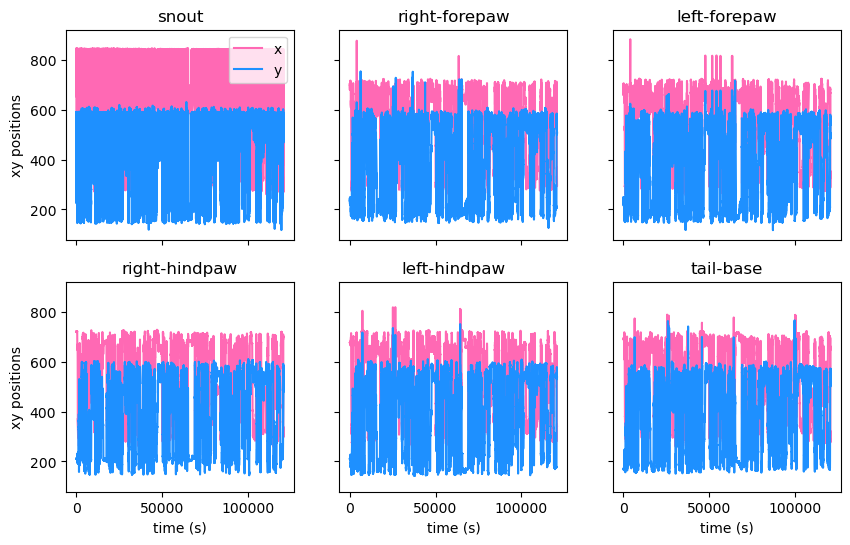

In [65]:
# plot all example files
bodyparts_names = ['snout',
                   'right-forepaw', 'left-forepaw', 
                   'right-hindpaw', 'left-hindpaw', 
                   'tail-base']
cols = 3
rows = int(np.ceil(int(pose.shape[1]/2)/cols))
count = 0
fig, ax = plt.subplots(rows, cols, figsize=(10, 6), sharex=True, sharey=True)
for row in range(rows):
    for col in range(cols):
        try:
            ax[row, col].plot(pose[:, 2*count], c='hotpink', label='x')
            ax[row, col].plot(pose[:, 2*count+1], c='dodgerblue', label='y')
            if col == 0 and row == 0:
                ax[row, col].legend()
            ax[row, col].set_title(bodyparts_names[count])
            if col == 0:
                ax[row, col].set_ylabel('xy positions')

            if row == rows-1:
                ax[row, col].set_xlabel('time (s)')
            count += 1
        except IndexError:
            pass

plt.show()



### save processed pose file 

In [66]:
np.save('../processed_data/pose_video_exp_16.npy', pose)